In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/satellite-orbital-data/train_data.csv')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-orbital-data/train_data 2.csv
/kaggle/input/satellite-orbital-data/train_data.csv


In [2]:
categorical_columns = []
for column in df.columns:
    df[column] = (pd.to_numeric(df[column], errors="coerce")).fillna(0)
    if (df[column].max() == df[column].min()==0):
        categorical_columns.append(column)

    if(df[column].max()>1e10):
        indices = np.where(df[column]>1e10)[0]
        df.loc[indices, column] = 1e10



print (categorical_columns)
    
    

['c_object_type']


In [4]:
def SF_create_random_forest(column, num_estimators):
    X_single = np.array(df[column].fillna(0)).reshape(-1,1)
    y = np.array(df['risk'])
    bins = [-np.inf, -15, -5, 5, np.inf]
    labels = ['high', 'medium', 'low', 'very_low'] 
    
    y = pd.cut(y, bins=bins, labels=labels) #allows splitting of continuous values into variables based on provided bins 

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.2, random_state=7
    )

    # Random Forest
    model = RandomForestClassifier(n_estimators = num_estimators, random_state=7)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print ("Risk is estimated to be", y_pred, "based on", column)
    print(f"Accuracy for miss: {accuracy:.2f}")
    return accuracy

In [22]:
df_copy = df.copy()
for column in df.columns:
    df_copy[column]=df.loc[0, column]
    df_copy[column+'_1']=df.loc[1, column]
    df_copy[column+'_2']=df.loc[2, column]
    df_copy[column+'_3']=df.loc[3, column]
    df_copy[column+'_4']=df.loc[4, column]


    

In [23]:
df_copy = df.copy()
unique_id = np.unique(df['event_id'])
for e_id in unique_id:
    indices = np.where(df['event_id']==e_id)
    indices = indices[0]
    for column in df.columns:
        df_copy[column]=df.loc[indices[0],column]
        for index in indices[1:]:
            df_copy[column+f'_{index}']=df.loc[index,column]
        
    

KeyboardInterrupt: 

In [15]:
df_copy = df.copy()
unique_id = np.unique(df['event_id'])
first_indices = []
all_indices = [[] for i in range(20)] #20 as placeholder for max num of estimates
for e_id in unique_id:
    indices = np.where(df['event_id']==e_id)
    indices = indices[0]
    first_indices.append(indices[0])
    for index in indices:
        all_indices.append()
for column in df.columns:
    df_copy[column]=df.loc(first_indices,column)
    for index in indices[1:]:
        

    
    

SyntaxError: incomplete input (4055490977.py, line 17)

In [24]:
#TIME SERIES
df_copy= df.copy()
unique_id= np.unique(df['event_id'])
for e_id in unique_id:
    indices = np.where(df['event_id']==e_id)[0]
    for i in range(1,len(indices)):
        index = indices[i]
        for column in df.columns:
            df_copy[column+str(i)]=np.array(df[column])[index]
        print (df_copy.head(1))
    break
            
    

   event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
0         0     1.566798           5 -10.204955          -7.834756   

   max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
0          8.602101        14923.0         13792.0                453.8   

   relative_position_t  ...  t_sigma_rdot1  c_sigma_rdot1  t_sigma_tdot1  \
0               5976.6  ...       0.059672      57.966413       0.003753   

   c_sigma_tdot1  t_sigma_ndot1  c_sigma_ndot1  F101  F3M1  SSN1   AP1  
0       0.164383       0.002933       0.386393  89.0  83.0  42.0  11.0  

[1 rows x 206 columns]
   event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
0         0     1.566798           5 -10.204955          -7.834756   

   max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
0          8.602101        14923.0         13792.0                453.8   

   relative_position_t  ...  t_sigma_rdot2  c_sigma_rdot2  t_sigma_tdot2  \
0               5

In [16]:
#10 tree forest
accuracy_of_estimates10sf = []
for column in df.columns:
    if column in categorical_columns:
        continue
    accuracy_of_estimates10sf.append(SF_create_random_forest(column, 10))

print (accuracy_of_estimates10sf)

Risk is estimated to be ['medium' 'high' 'high' ... 'medium' 'high' 'medium'] based on event_id
Accuracy for miss: 0.74
Risk is estimated to be ['high' 'medium' 'medium' ... 'high' 'high' 'high'] based on time_to_tca
Accuracy for miss: 0.60
Risk is estimated to be ['medium' 'high' 'medium' ... 'high' 'high' 'medium'] based on mission_id
Accuracy for miss: 0.56
Risk is estimated to be ['medium' 'high' 'medium' ... 'medium' 'high' 'medium'] based on risk
Accuracy for miss: 1.00
Risk is estimated to be ['high' 'medium' 'medium' ... 'high' 'high' 'medium'] based on max_risk_estimate
Accuracy for miss: 0.51
Risk is estimated to be ['medium' 'high' 'medium' ... 'low' 'high' 'medium'] based on max_risk_scaling
Accuracy for miss: 0.94
Risk is estimated to be ['high' 'high' 'medium' ... 'medium' 'high' 'high'] based on miss_distance
Accuracy for miss: 0.52
Risk is estimated to be ['medium' 'medium' 'high' ... 'medium' 'medium' 'medium'] based on relative_speed
Accuracy for miss: 0.68
Risk is es

In [ ]:
save_dictionary = {'10 Trees':accuracy_of_estimates10sf}
df_save= pd.DataFrame(save_dictionary)
df_save.to_pickle('10TreeSingleFeatureAnalysis.pkl')

[1.         0.94312417 0.85544317 0.85227657 0.84234636 0.82076429
 0.79629231 0.79272604 0.76404218 0.75297445 0.7454115  0.74163003
 0.73628063 0.73563501 0.73068528 0.71386848 0.71368402 0.70867279
 0.69333169 0.68204876 0.67550035 0.67156516 0.66231131 0.66231131
 0.65883727 0.65560919 0.65216589 0.64669352 0.64666277 0.64306576
 0.62966151 0.62274418 0.62114551 0.60838688 0.60574292 0.60226888
 0.60211517 0.59369139 0.59126264 0.58849571 0.58754266 0.5839149
 0.58317705 0.58283887 0.5812402  0.57945707 0.57699757 0.5763827
 0.57592154 0.55805946 0.55682971 0.55682971 0.55646079 0.55606112
 0.55563071 0.55563071 0.5534479  0.55191072 0.55132659 0.5502813
 0.54929751 0.54911304 0.54843668 0.54772958 0.54720694 0.54305654
 0.54231869 0.54182679 0.54121192 0.54115043 0.53995142 0.53995142
 0.53733821 0.53506318 0.53475574 0.51947613 0.51929167 0.51551019
 0.51526424 0.51323516 0.51031451 0.51022228 0.51013005 0.5096074
 0.50920774 0.50914625 0.50893104 0.50770129 0.50699419 0.50607188

<BarContainer object of 10 artists>

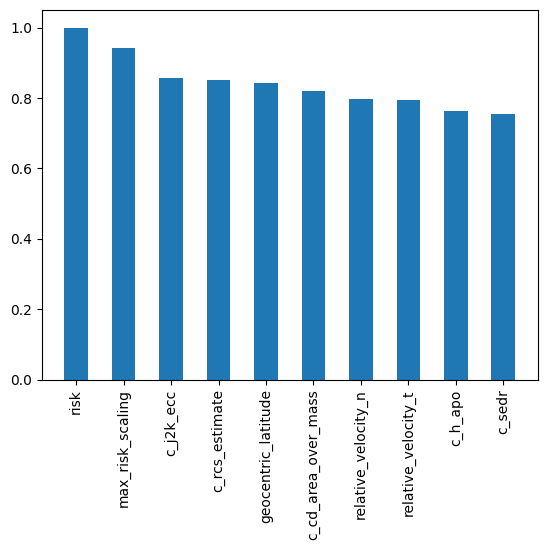

In [17]:
#barcharts

accuracies = accuracy_of_estimates10sf 
indices = np.argsort(np.array(accuracies))[::-1]
accuracies = np.array(accuracies)[indices]
columns = np.array(df.columns)[indices]
plt.xticks(rotation=90)
print (accuracies)
plt.bar(columns[:10], accuracies[:10], width=.5)

In [ ]:
#30 trees
accuracy_of_estimates30sf = []
for column in df.columns:
    if column in categorical_columns:
        continue
    accuracy_of_estimates30sf.append(SF_create_random_forest(column, 30))

print (accuracy_of_estimates30sf)

Risk is estimated to be ['medium' 'high' 'high' ... 'medium' 'high' 'medium'] based on event_id
Accuracy for miss: 0.74
Risk is estimated to be ['high' 'medium' 'medium' ... 'high' 'high' 'high'] based on time_to_tca
Accuracy for miss: 0.60
Risk is estimated to be ['medium' 'high' 'medium' ... 'high' 'high' 'medium'] based on mission_id
Accuracy for miss: 0.56
Risk is estimated to be ['medium' 'high' 'medium' ... 'medium' 'high' 'medium'] based on risk
Accuracy for miss: 1.00
Risk is estimated to be ['high' 'medium' 'medium' ... 'high' 'high' 'medium'] based on max_risk_estimate
Accuracy for miss: 0.51
Risk is estimated to be ['medium' 'high' 'medium' ... 'low' 'high' 'medium'] based on max_risk_scaling
Accuracy for miss: 0.94
Risk is estimated to be ['high' 'high' 'medium' ... 'medium' 'high' 'high'] based on miss_distance
Accuracy for miss: 0.52
Risk is estimated to be ['medium' 'medium' 'high' ... 'medium' 'medium' 'medium'] based on relative_speed
Accuracy for miss: 0.68
Risk is es

In [ ]:
save_dictionary = {'30 Trees':accuracy_of_estimates30sf}
df_save= pd.DataFrame(save_dictionary)
df_save.to_pickle('30TreeSingleFeatureAnalysis.pkl')

[1.         0.94235558 0.8596858  0.85550466 0.84738832 0.82491469
 0.7990285  0.79493959 0.76478003 0.7556799  0.74578043 0.74193747
 0.73707996 0.73692625 0.73498939 0.71583607 0.71476005 0.71260799
 0.69680573 0.68407784 0.67045839 0.66719956 0.66231131 0.66231131
 0.65459464 0.65004458 0.64746211 0.64484889 0.6430965  0.63759338
 0.63162911 0.62345129 0.62016171 0.60857134 0.60251483 0.60177699
 0.59790328 0.59138562 0.59129339 0.58901835 0.58846497 0.58323854
 0.5802564  0.57961078 0.57951855 0.57902665 0.57844252 0.5775817
 0.57586005 0.55790574 0.55646079 0.55581517 0.55575368 0.55563071
 0.55563071 0.55501583 0.55369385 0.55246411 0.5510499  0.55095767
 0.54969717 0.54846743 0.54815999 0.5478833  0.54720694 0.54330249
 0.54228795 0.54179605 0.54121192 0.54121192 0.54004366 0.54004366
 0.53601623 0.53567805 0.53122022 0.51947613 0.51609432 0.5130507
 0.51046823 0.50896179 0.50868509 0.50837766 0.50810096 0.50782427
 0.50708642 0.50705568 0.50527254 0.50484213 0.50462693 0.503704

<BarContainer object of 10 artists>

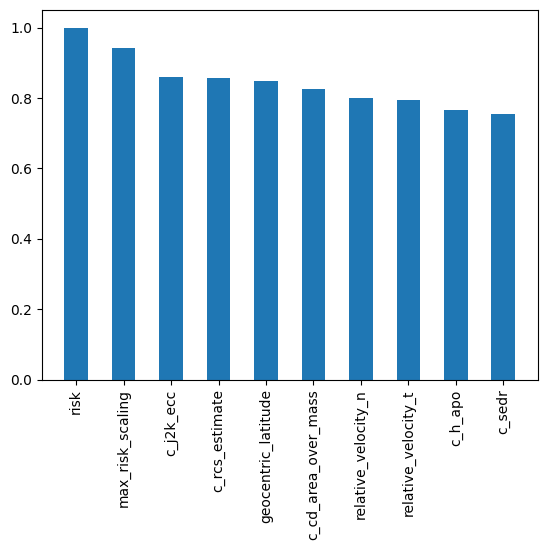

In [8]:
#barcharts

accuracies = accuracy_of_estimates30sf
indices = np.argsort(np.array(accuracies))[::-1]
accuracies = np.array(accuracies)[indices]
columns = np.array(df.columns)[indices]
plt.xticks(rotation=90)
print (accuracies)
plt.bar(columns[:10], accuracies[:10], width=.5)

In [ ]:
#100 trees
accuracy_of_estimates = []
for column in df.columns:
    if column in categorical_columns:
        continue
    accuracy_of_estimates.append(SF_create_random_forest(column, 100))

print (accuracy_of_estimates)

In [ ]:
save_dictionary = {'100 Trees':accuracy_of_estimates}
df_save= pd.DataFrame(save_dictionary)
df_save.to_pickle('100TreeSingleFeatureAnalysis.pkl')

In [ ]:
#barcharts

accuracies = accuracy_of_estimates 
indices = np.argsort(np.array(accuracies))[::-1]
accuracies = np.array(accuracies)[indices]
columns = np.array(df.columns)[indices]
plt.xticks(rotation=90)
print (accuracies)
plt.bar(columns[:10], accuracies[:10], width=.5)

In [9]:
def DF_create_random_forest(column1, column2, num_estimators):
    features = [column1, column2]
    X = ((df[features].to_numpy()))#.reshape(-1,1)
    y = np.array(df['risk'])
    bins = [-np.inf, -15, -5, 5, np.inf]
    labels = ['high', 'medium', 'low', 'very_low'] 
    
    y = pd.cut(y, bins=bins, labels=labels) #allows splitting of continuous values into variables based on provided bins 

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
    )

    # Random Forest
    model = RandomForestClassifier(n_estimators=num_estimators, random_state=7)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print ("Risk is estimated to be", y_pred, "based on", column1, "and", column2)
    print(f"Accuracy for miss: {accuracy:.2f}")
    return accuracy

In [10]:
#10 trees
accuracy_of_estimates10df = []
dual_column_list=[]
for i in range(0,len(df.columns)-1,2):
    if column in categorical_columns:
        continue
    accuracy_of_estimates10df.append(DF_create_random_forest(df.columns[i], df.columns[i+1], 10))
    dual_column_list.append([df.columns[i],df.columns[i+1]])

print (accuracy_of_estimates10df)

Risk is estimated to be ['medium' 'high' 'high' ... 'medium' 'medium' 'high'] based on event_id and time_to_tca
Accuracy for miss: 0.65
Risk is estimated to be ['medium' 'high' 'medium' ... 'medium' 'high' 'medium'] based on mission_id and risk
Accuracy for miss: 1.00
Risk is estimated to be ['medium' 'high' 'medium' ... 'medium' 'high' 'medium'] based on max_risk_estimate and max_risk_scaling
Accuracy for miss: 1.00
Risk is estimated to be ['medium' 'high' 'medium' ... 'medium' 'high' 'high'] based on miss_distance and relative_speed
Accuracy for miss: 0.75
Risk is estimated to be ['medium' 'medium' 'high' ... 'medium' 'high' 'high'] based on relative_position_r and relative_position_t
Accuracy for miss: 0.66
Risk is estimated to be ['medium' 'medium' 'medium' ... 'medium' 'high' 'medium'] based on relative_position_n and relative_velocity_r
Accuracy for miss: 0.72
Risk is estimated to be ['medium' 'high' 'high' ... 'medium' 'high' 'medium'] based on relative_velocity_t and relative_v

In [ ]:
save_dictionary = {'10 Trees':accuracy_of_estimates10df}
df_save= pd.DataFrame(save_dictionary)
df_save.to_pickle('10TreeDoubleFeatureAnalysis.pkl')

[1.         0.99680266 0.90506349 0.90407969 0.88677099 0.87142989
 0.86933932 0.84914071 0.84357611 0.83423002 0.80360931 0.79085068
 0.7646878  0.75248255 0.74510407 0.73394411 0.72650414 0.7188797
 0.71771144 0.71725028 0.71657392 0.71629723 0.71140898 0.70885726
 0.69416177 0.67952778 0.67774464 0.67599225 0.66686138 0.66231131
 0.65856058 0.65813017 0.65573216 0.64835368 0.62517293 0.62243674
 0.60051649 0.5924309  0.59196975 0.57675162 0.573708   0.56971132
 0.56583761 0.56024226 0.55984259 0.55467765 0.54477818 0.54075076
 0.53995142 0.53985919 0.53626218]


<BarContainer object of 10 artists>

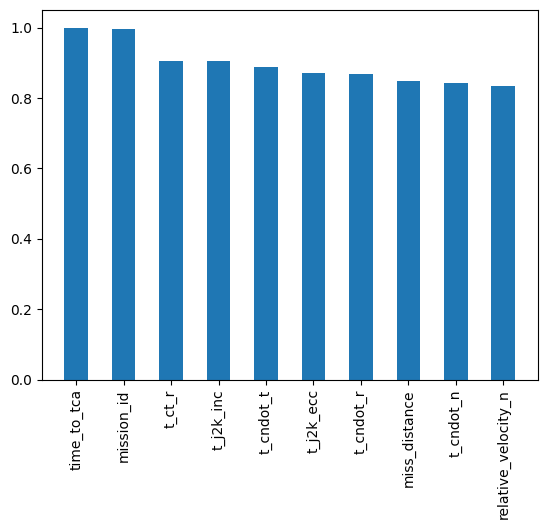

In [12]:
#barchartsdf

accuracies = accuracy_of_estimates10df
indices = np.argsort(np.array(accuracies))[::-1]
accuracies = np.array(accuracies)[indices]
columns = np.array(dual_column_list)[indices]
columns = [" & ".join(col) if isinstance(col, (list, np.ndarray)) else str(col) 
           for col in columns]
print (columns)
plt.xticks(rotation=90)
print (accuracies)
plt.bar(columns[:10], accuracies[:10], width=.5)

In [ ]:
#30 trees
accuracy_of_estimates30df = []
dual_column_list=[]
for i in range(0,len(df.columns)-1,2):
    if column in categorical_columns:
        continue
    accuracy_of_estimates30df.append(DF_create_random_forest(df.columns[i], df.columns[i+1], 30))
    dual_column_list.append([df.columns[i],df.columns[i+1]])

print (accuracy_of_estimates30df)

In [ ]:
save_dictionary = {'30 Trees':accuracy_of_estimates30df}
df_save= pd.DataFrame(save_dictionary)
df_save.to_pickle('30TreeDoubleFeatureAnalysis.pkl')

In [ ]:
#barchartsdf

accuracies = accuracy_of_estimates30df
indices = np.argsort(np.array(accuracies))[::-1]
accuracies = np.array(accuracies)[indices]
columns = np.array(dual_column_list)[indices]
columns = [" & ".join(col) if isinstance(col, (list, np.ndarray)) else str(col) 
           for col in columns]
print (columns)
plt.xticks(rotation=90)
print (accuracies)
plt.bar(columns[:10], accuracies[:10], width=.5)

In [ ]:
#100 trees
accuracy_of_estimatesdf = []
dual_column_list=[]
for i in range(0,len(df.columns)-1,2):
    if column in categorical_columns:
        continue
    accuracy_of_estimatesdf.append(DF_create_random_forest(df.columns[i], df.columns[i+1], 100))
    dual_column_list.append([df.columns[i],df.columns[i+1]])

print (accuracy_of_estimatesdf)

In [ ]:
save_dictionary = {'100 Trees':accuracy_of_estimatesdf}
df_save= pd.DataFrame(save_dictionary)
df_save.to_pickle('100TreeDoubleFeatureAnalysis.pkl')

In [ ]:
#barchartsdf

accuracies = accuracy_of_estimatesdf
indices = np.argsort(np.array(accuracies))[::-1]
accuracies = np.array(accuracies)[indices]
columns = np.array(dual_column_list)[indices]
columns = [" & ".join(col) if isinstance(col, (list, np.ndarray)) else str(col) 
           for col in columns]
print (columns)
plt.xticks(rotation=90)
print (accuracies)
plt.bar(columns[:10], accuracies[:10], width=.5)

In [ ]:
#normalization
x = df["miss_distance"]
xmin = x.min()
x-=xmin
xmax = x.max()
x/=xmax
print (x, x.min(), x.max())

In [ ]:
#normalization
x = df["miss_distance"]
xmin = x.min()
x-=xmin
indices = np.where(x==x.min())[0]
indices2 = np.where(x!=x.min())[0]
x2 = x[indices2]
x[indices] = x2.min()
x = np.log10(x)
x-=x.min()
xmax = x.max()
x/=xmax
print (x, x.min(), x.max())